<div style="color:white;font-size:300%;text-align:center;display:fill;border-radius:5px;overflow:hidden;font-weight:500"> </br> Leo Messi - All Club Goals Stats</div>

# 1. Introduction

**Lionel Andrés Messi, also known as Leo Messi, s an Argentine professional footballer who plays as a forward for Ligue 1 club Paris Saint-Germain and captains the Argentina national team.**

- Born: June 24, 1987 (age 34 years), Rosario, Argentina
- Height: 1.69 m
- Spouse: Antonela Roccuzzo (m. 2017)
- Salary: 41 million USD (2022)
- Current teams: Paris Saint-Germain F.C. (#30 / Forward), Argentina national football team (#10 / Forward)
- Children: Mateo Messi Roccuzzo, Thiago Messi Roccuzzo, Ciro Messi Roccuzzo
- Awards: European Golden Shoe, FIFA World Player of the Year, MORE

<img src="https://c4.wallpaperflare.com/wallpaper/16/671/726/lionel-messi-football-barcelona-hd-wallpaper-preview.jpg" style="width:100vw;" />

# 2. Data, Modules Loading and Config

# 2.1. Moduules Loading

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import timedelta
import warnings
import os
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
from sklearn.linear_model import LinearRegression

# 2.2. Config

In [2]:
warnings.filterwarnings('ignore')
init_notebook_mode(connected=True)

# 2.3. Data Loading

In [69]:
df=pd.read_csv("./data.csv")

# 3. Basic Exploration

In [12]:
df.head(5)

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
0,04/05,LaLiga,34,05-01/05,H,FC Barcelona,Albacete Balompie,2:00,CF,90+1,2:00,Left-footed shot,Ronaldinho Gaacho
1,05/06,UEFA Champions League,Group Stage,11-02/05,H,FC Barcelona,Panathinaikos Athens,5:00,RW,34,3:00,Left-footed shot,NaN
2,05/06,LaLiga,13,11/27/05,H,FC Barcelona,Racing Santander,4:01,RW,51,2:00,Left-footed shot,Samuel Etoo
3,05/06,LaLiga,19,1/15/06,H,FC Barcelona,Athletic Bilbao,2:01,RW,50,2:01,Left-footed shot,Mark van Bommel
4,05/06,LaLiga,20,1/22/06,H,FC Barcelona,Deportivo Alaves,2:00,CF,82,2:00,Left-footed shot,Ronaldinho Gaacho


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 697 entries, 0 to 696
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Season            697 non-null    object
 1   Competition       697 non-null    object
 2   Matchday          697 non-null    object
 3   Date              697 non-null    object
 4   Venue             697 non-null    object
 5   Club              697 non-null    object
 6   Opponent          697 non-null    object
 7   Result            697 non-null    object
 8   Playing_Position  697 non-null    object
 9   Minute            697 non-null    object
 10  At_score          697 non-null    object
 11  Type              696 non-null    object
 12  Goal_assist       484 non-null    object
dtypes: object(13)
memory usage: 70.9+ KB


In [14]:
df.describe(include=['object']).T

,count,unique,top,freq
Season,697,19,11-Dec,73
Competition,697,10,LaLiga,474
Matchday,697,48,Group Stage,80
Date,697,448,03/07/12,5
Venue,697,2,H,415
Club,697,2,FC Barcelona,672
Opponent,697,93,Sevilla FC,38
Result,697,51,4:00,47
Playing_Position,697,9,CF,273
Minute,697,106,55,13


# 4. Exploritory Data Analysis of club Goals

## 4.1. Goals per competition

Text(0.5, 1.0, 'Goals per competition')

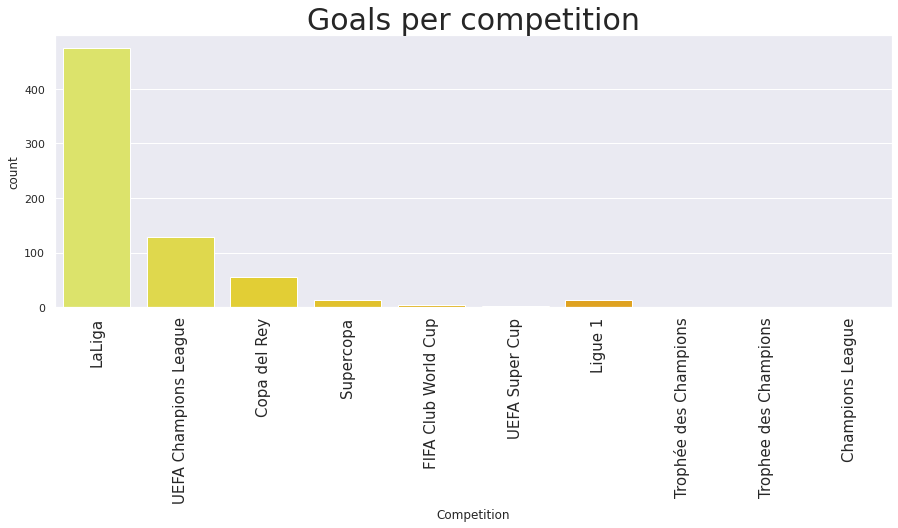

In [19]:
sns.set(rc={'figure.figsize':(15,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.countplot(df['Competition'],palette='Wistia')
p.axes.set_title("Goals per competition",fontsize=30)

### Observations: 
- Scored mostly in La-Liga.

## 4.2. Goals per season

Text(0.5, 1.0, 'Goals per season')

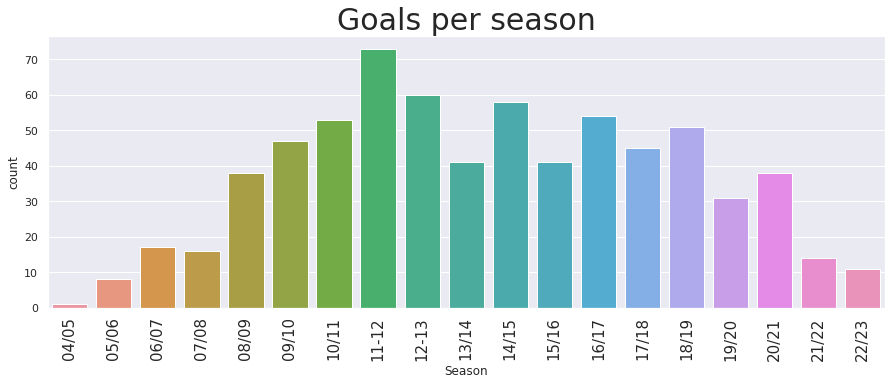

In [70]:
sns.set(rc={'figure.figsize':(15,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.countplot(df['Season'],hue_order=df.groupby('Competition'))
p.axes.set_title("Goals per season",fontsize=30)

### Observations: 
- Scored most goals in 2011/12. 
- Then, 2012-13. Those years are the golden time for his career.

## 4.3. Goals per Clubs

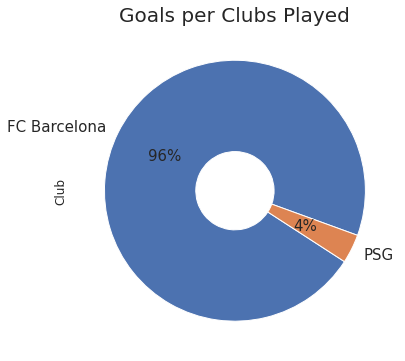

In [26]:
plt.figure(figsize=(6,6))
plt.title('Goals per Clubs Played', fontsize=20)
df.Club.value_counts().plot(kind='pie', labels=['FC Barcelona', 'PSG'], wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20,  textprops={'fontsize': 15})

### Observations: 
- Scored 96% goals for Barcelona.

## 4.4. Goals per playing Position

Text(0.5, 1.0, 'Goals per Playing Position')

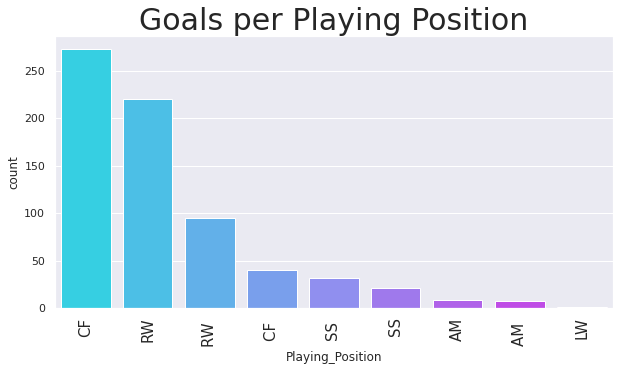

In [37]:
sns.set(rc={'figure.figsize':(10,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.countplot(df['Playing_Position'],palette='cool',order=df.Playing_Position.value_counts().sort_values(ascending=False).index)
p.axes.set_title("Goals per Playing Position",fontsize=30)

### Observations: 
- Played best as Center Forward; then as Right Winger.

## 4.5. Goals per Game Minute

In [38]:
mins=list(map(str, range(1,121)))
mins.insert(45,"1stE")
mins.insert(91,"2ndE")
mins.insert(122,"ExtE")

In [39]:
df.loc[df.Minute.str[:3]=='45+', 'Minute'] = '1stE'
df.loc[df.Minute.str[:3]=='90+', 'Minute'] = '2ndE'
df.loc[df.Minute.str[:4]=='120+', 'Minute'] = 'ExtE'

In [40]:
mins1=mins[:23]
mins2=mins[23:46]
mins3=mins[46:69]
mins4=mins[69:92]
mins5=mins[92:]

Text(0.5, 1.0, 'Goals per Game Minute (1-23)')

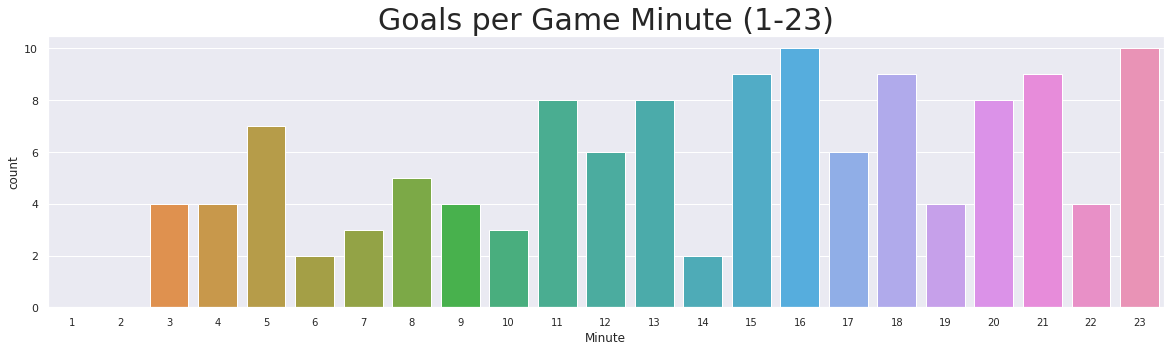

In [42]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=10)
p=sns.countplot(df['Minute'],order=mins1)
p.axes.set_title("Goals per Game Minute (1-23)",fontsize=30)

Text(0.5, 1.0, 'Goals per Game Minute (24-1st Half Extra time)')

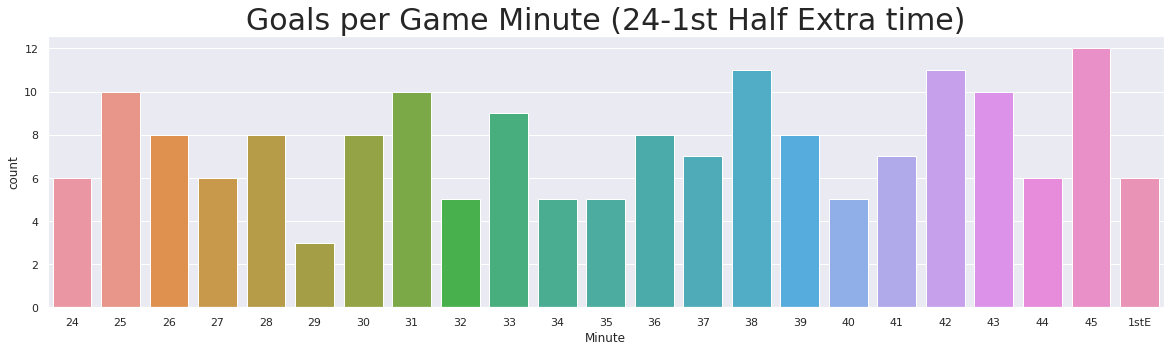

In [47]:
p=sns.countplot(df['Minute'],order=mins2)
p.axes.set_title("Goals per Game Minute (24-1st Half Extra time)",fontsize=30)

Text(0.5, 1.0, 'Goals per Game Minute (46-68)')

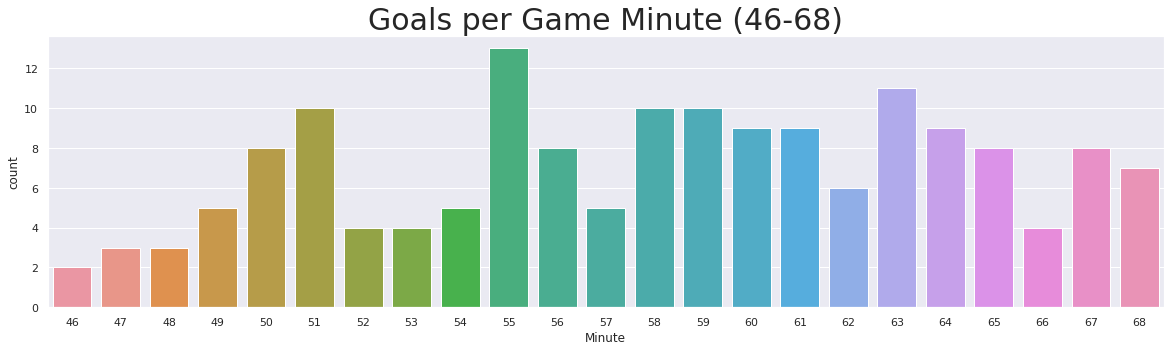

In [46]:
p=sns.countplot(df['Minute'],order=mins3)
p.axes.set_title("Goals per Game Minute (46-68)",fontsize=30)

Text(0.5, 1.0, 'Goals per Game Minute (69-2nd Half Extra time)')

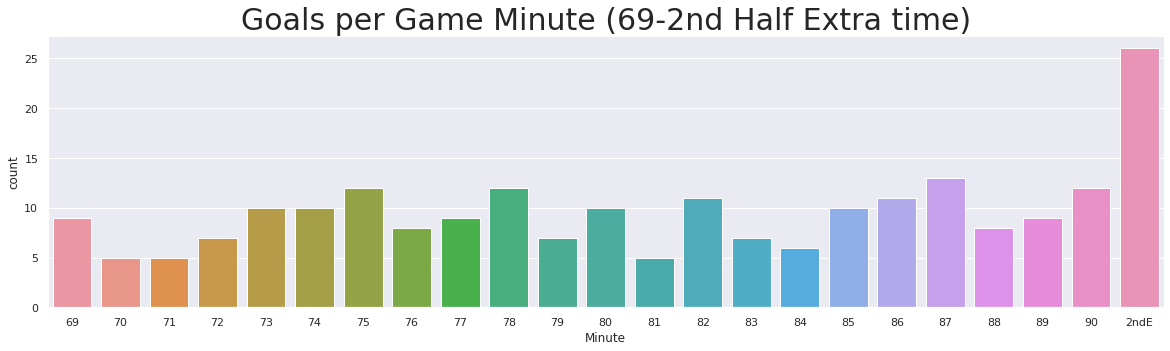

In [45]:
p=sns.countplot(df['Minute'],order=mins4)
p.axes.set_title("Goals per Game Minute (69-2nd Half Extra time)",fontsize=30)

Text(0.5, 1.0, 'Goals per Game Minute (Draw - Extra time)')

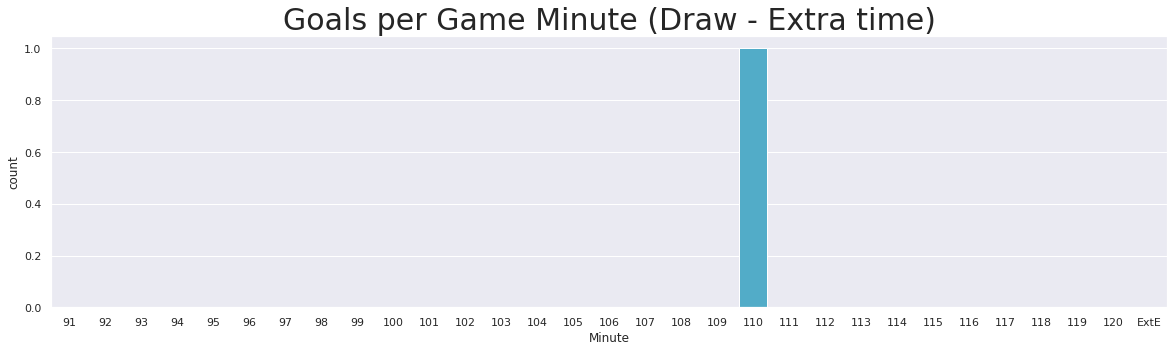

In [43]:
p=sns.countplot(df['Minute'],order=mins5)
p.axes.set_title("Goals per Game Minute (Draw - Extra time)",fontsize=30)

### Observations: 
- Havesn't scored in 1st and 2nd Minutes only!!!

## 4.6. Goals per Type_of_goal

Text(0.5, 1.0, 'Goals per Type of goal scored')

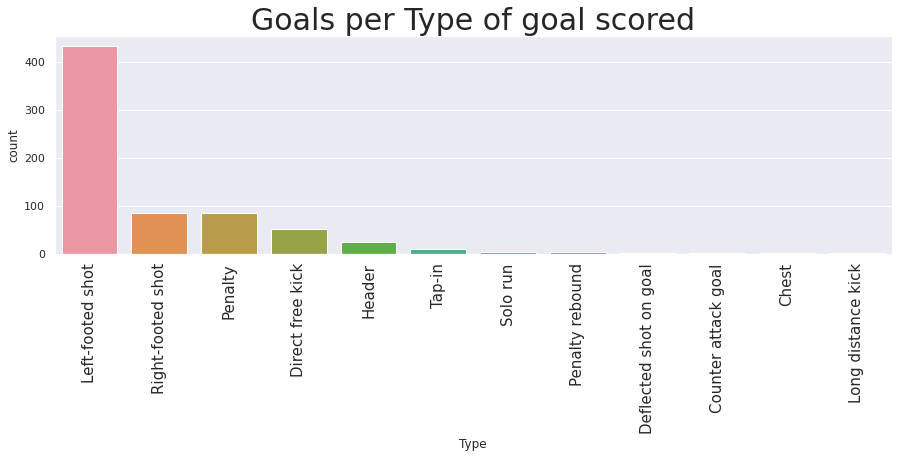

In [71]:
sns.set(rc={'figure.figsize':(15,4)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.countplot(df['Type'],hue_order=df.groupby('Competition'),order=df.Type.value_counts().sort_values(ascending=False).index)
p.axes.set_title("Goals per Type of goal scored",fontsize=30)

### Observations: 
- He is a left foot based - dependent player.

## 4.7. Scoreline after goal

Text(0.5, 1.0, 'Scoresheet after scoring')

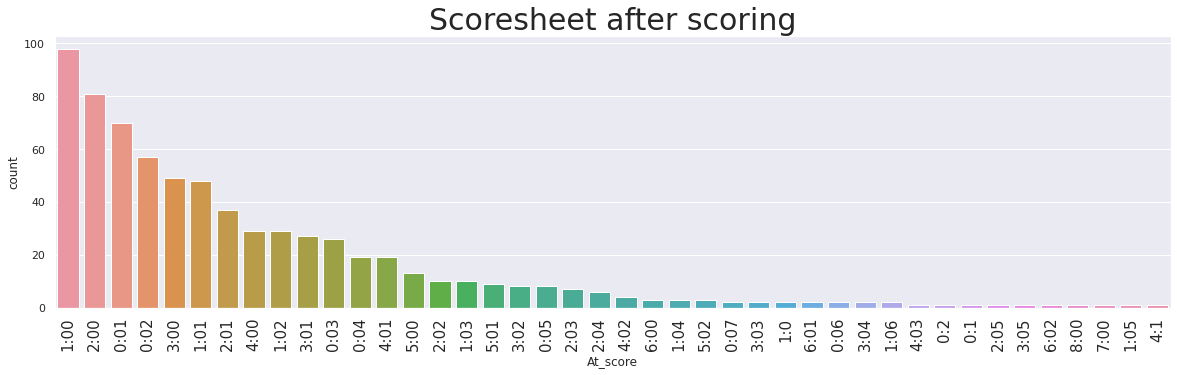

In [67]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.countplot(df['At_score'],hue_order=df.groupby('Competition'),order=df.At_score.value_counts().sort_values(ascending=False).index)
p.axes.set_title("Scoresheet after scoring",fontsize=30)

### Observations: 
- Scored most of the opening goals.

## 4.8. Opponents

Text(0.5, 1.0, 'Goals per Opponent')

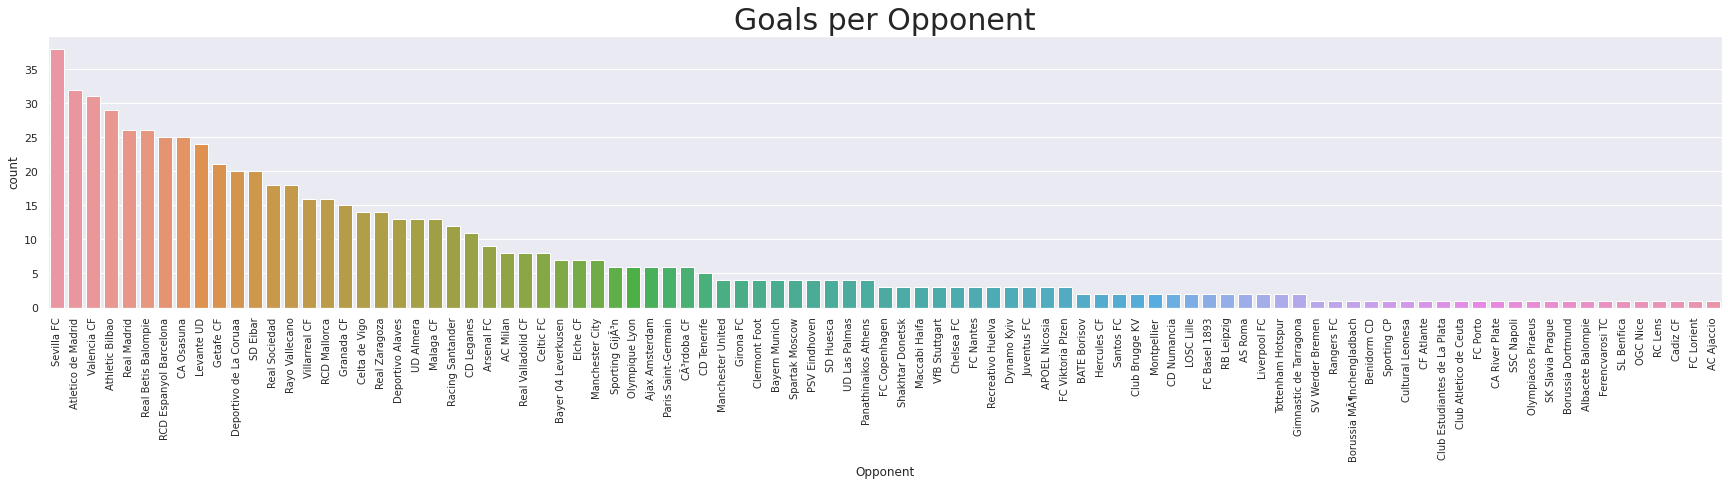

In [52]:
sns.set(rc={'figure.figsize':(30,5)})
plt.xticks(fontsize=10,rotation='vertical')
p=sns.countplot(df['Opponent'],hue_order=df.groupby('Competition'),order=df.Opponent.value_counts().sort_values(ascending=False).index)
p.axes.set_title("Goals per Opponent",fontsize=30)

## 4.9. Favourite Opponents

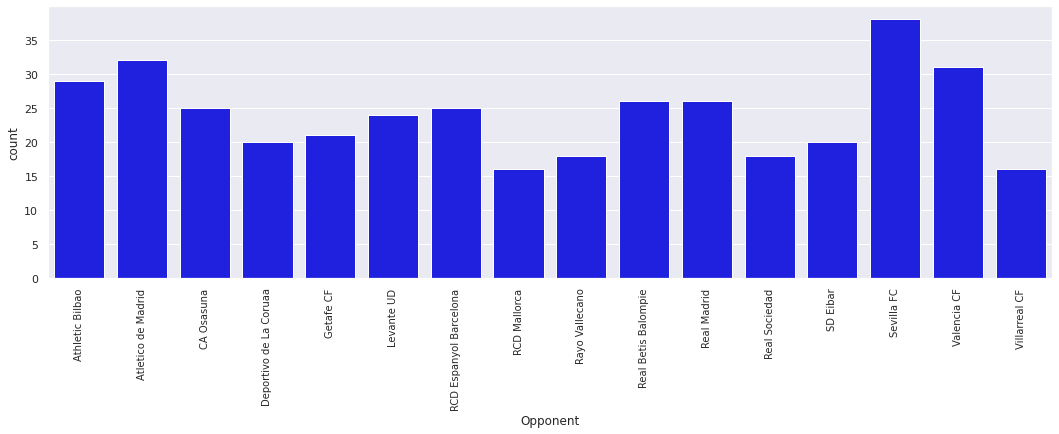

In [55]:
sns.set(rc={'figure.figsize':(18,5)})
opponents_df=df.groupby('Opponent').size().reset_index(name='count')
fav_opponents_df=opponents_df[opponents_df["count"]>15]
plt.xticks(fontsize=10,rotation='vertical')
p=sns.barplot(x=fav_opponents_df['Opponent'],y=fav_opponents_df['count'],color="blue")

### Observations: 
- Sevilla, Atletco Madrid and Valencia -  are his favourite opponents.

## 4.10. Assist

Text(0.5, 1.0, 'Goals Assist')

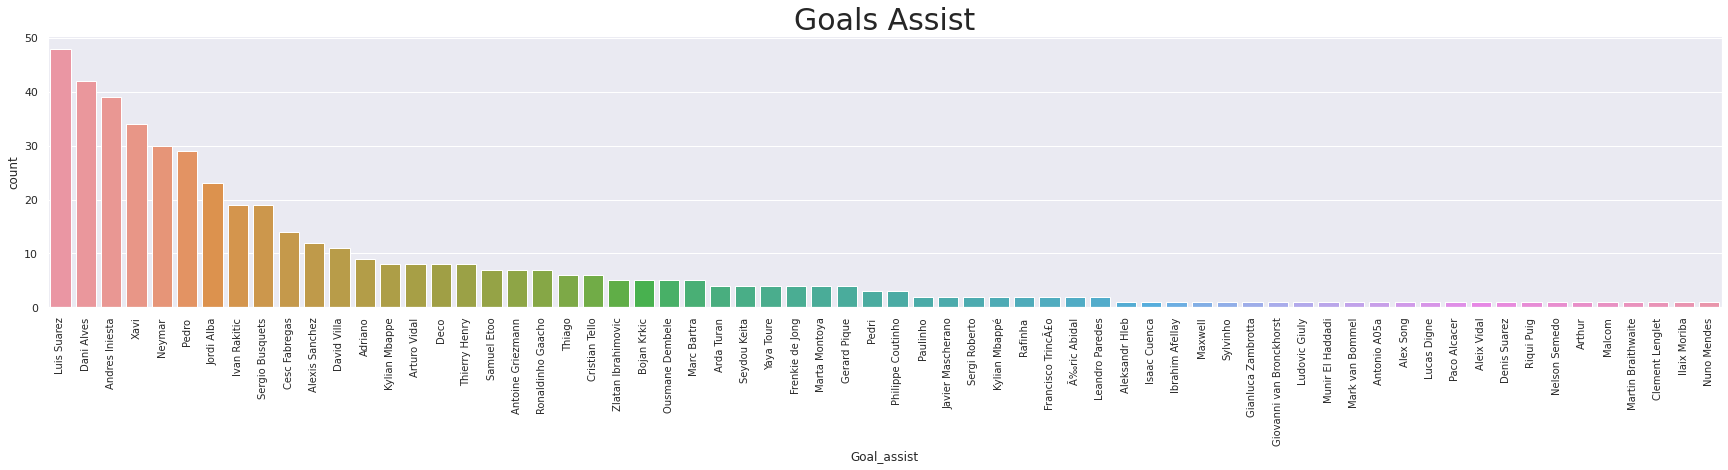

In [54]:
sns.set(rc={'figure.figsize':(30,5)})
plt.xticks(fontsize=10,rotation='vertical')
p=sns.countplot(df['Goal_assist'],order=df.Goal_assist.value_counts().sort_values(ascending=False).index)
p.axes.set_title("Goals Assist",fontsize=30)

## 4.11. Most Assisted by

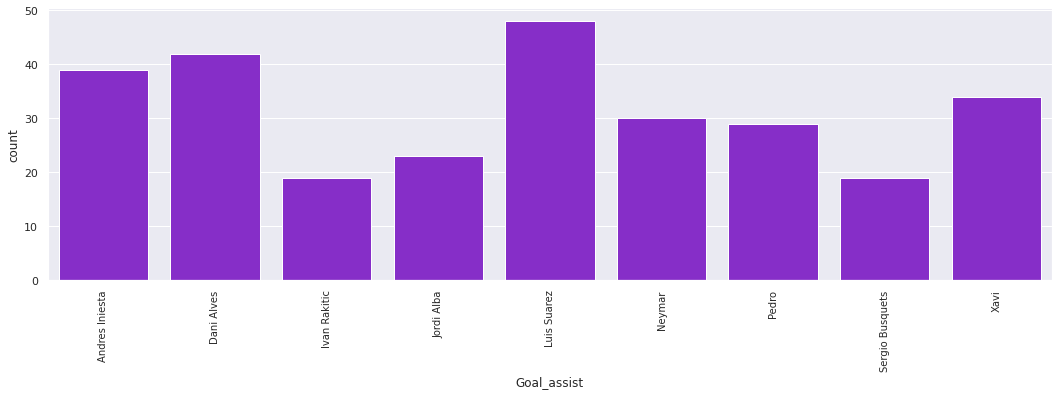

In [57]:
sns.set(rc={'figure.figsize':(18,5)})
opponents_df=df.groupby('Goal_assist').size().reset_index(name='count')
fav_opponents_df=opponents_df[opponents_df["count"]>15]
plt.xticks(fontsize=10,rotation='vertical')
p=sns.barplot(x=fav_opponents_df['Goal_assist'],y=fav_opponents_df['count'],color="#8a15e1")

### Observations: 
- uarex assisted him most, followed by Dani Alves

## 4.12. Home - Away goals

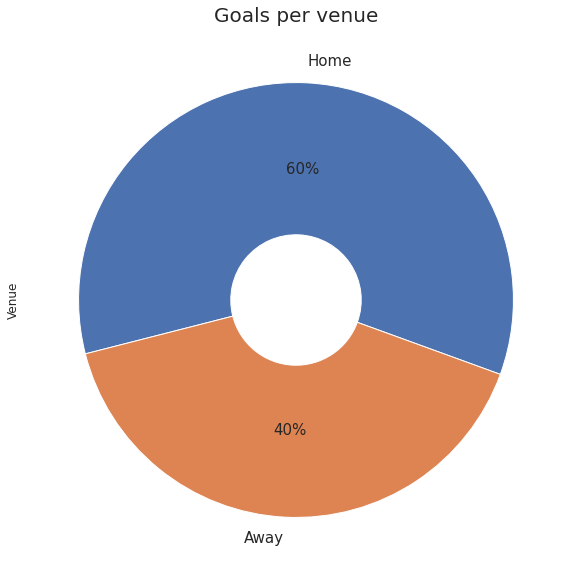

In [58]:
plt.figure(figsize=(30,10))
plt.title('Goals per venue', fontsize=20)
df.Venue.value_counts().plot(kind='pie', labels=['Home', 'Away'], wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20,  textprops={'fontsize': 15})

### Observations: 
- Scored most at homes.